The data should be partitioned into training and validation sets to evaluate the performance of a machine learning model. The training set is used to fit the model parameters using the input predictors and the corresponding output variable. On the other hand, the validation set is used to evaluate the performance of the model on unseen data. The primary reason for partitioning the data into training and validation sets is to avoid overfitting, which occurs when the model performs well on the training data but poorly on the validation data.

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('BostonHousing(7).csv')

# Create the predictor variables and the response variable
predictors = data[['CRIM', 'CHAS', 'RM']]
response = data['MEDV']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(predictors, response, test_size=0.2, random_state=42)

# Add a constant term to the predictors
X_train = sm.add_constant(X_train)
X_val = sm.add_constant(X_val)

# Fit the multiple linear regression model on the training set
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model on the training set
print(model.summary())

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the R-squared value on the validation set
R2 = 1 - ((y_val - y_pred)**2).sum()/((y_val - y_val.mean())**2).sum()

# Print the R-squared value on the validation set
print(f"R-squared on validation set: {R2:.2f}")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     180.6
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           4.93e-74
Time:                        18:52:48   Log-Likelihood:                -1302.1
No. Observations:                 404   AIC:                             2612.
Df Residuals:                     400   BIC:                             2628.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -30.5211      2.815    -10.843      0.0

In [3]:
# Predict the median house price for a new set of predictors
new_predictors = [1, 0.1, 0, 6] # [const, CRIM, CHAS, RM]
predicted_price = model.predict(new_predictors)

# Print the predicted median house price
print("Predicted median house price:", float(predicted_price))

Predicted median house price: 20.72346534870676


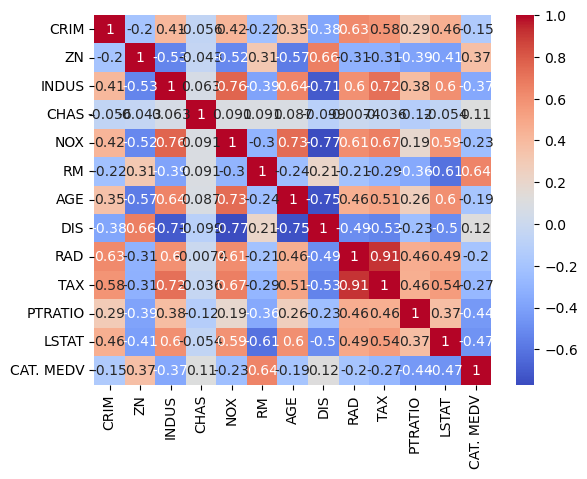

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('BostonHousing(7).csv')

# Create the predictor variables
predictors = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT', 'CAT. MEDV']]

# Calculate the correlation matrix
corr_matrix = predictors.corr()

# Create a heat map of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

From the above heatmap we can see that INDUS & DIS (-0.71), NOX & DIS (0.77), AGE & DIS (0.75), INDUS & NOX (0.76), INDUS & TAX (0.72), NOX & AGE (0.73), RAD & TAX (0.91) are the ones that have a high correlation. 


Therefore, we can say that INDUS, NOX, DIS, AGE, TAX, RAD are the variables that would be measuring the same thing. 

We can remove the above mentioned variables. 

Columns selected: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
Columns selected: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
Columns selected: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO']
Columns selected: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']
Columns selected: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX', 'PTRATIO']
Columns selected: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX']
Columns selected: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'AGE', 'TAX']
Columns selected: ['CRIM', 'CHAS', 'NOX', 'AGE', 'TAX']
Columns selected: ['CRIM', 'CHAS', 'NOX', 'TAX']
Columns selected: ['CHAS', 'NOX', 'TAX']
Columns selected: ['CHAS', 'NOX']
Columns selected: ['CHAS']
Columns selected: ['CAT. MEDV']
Columns selected: ['CAT. MEDV', 'LSTAT']
Columns selected: ['CAT. MEDV', 'LSTAT', 'PTRATIO']
Columns selected: ['CAT. MEDV', 'LSTAT', 'PTRATIO', '

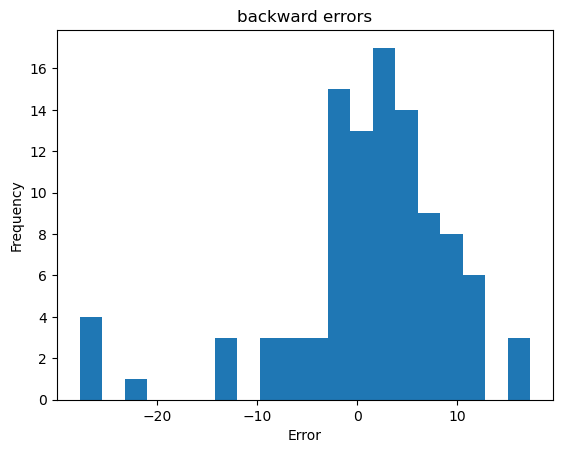

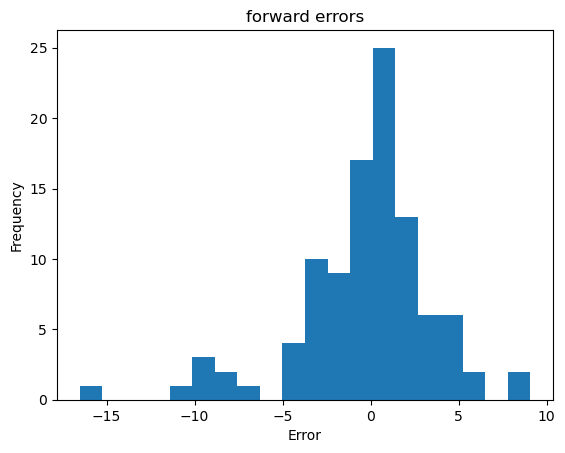

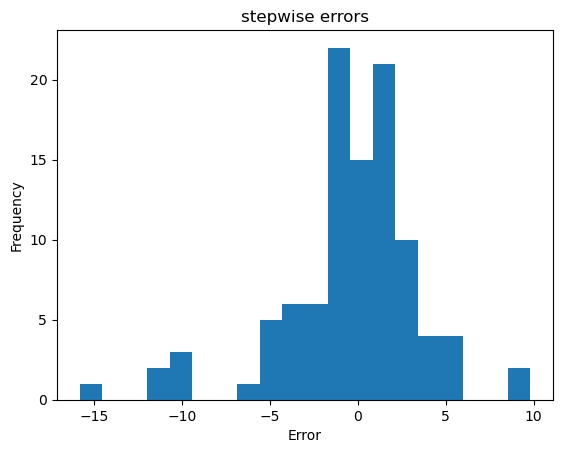

In [6]:
from telnetlib import theNULL
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load the data
data = pd.read_csv('BostonHousing(7).csv')
X = data.drop(['MEDV'], axis=1)
y = data['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to calculate the performance metrics
def calc_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mean_error = np.mean(y_pred - y_true)
    return rmse, mape, mean_error

# Backward subset selection
lr = LinearRegression()
cols = list(X_train.columns)
while len(cols) > 1:
    rmse_list = []
    for col in cols:
        cols_subset = [c for c in cols if c != col]
        X_train_subset = X_train[cols_subset]
        X_test_subset = X_test[cols_subset]
        lr.fit(X_train_subset, y_train)
        y_pred = lr.predict(X_test_subset)
        rmse, _, _ = calc_metrics(y_test, y_pred)
        rmse_list.append(rmse)
    worst_col = cols[np.argmax(rmse_list)]
    cols.remove(worst_col)
    
X_train_backward = X_train[cols]
X_test_backward = X_test[cols]

# Forward subset selection
lr = LinearRegression()
cols = []
for i in range(X_train.shape[1]):
    best_rmse = np.inf
    best_col = None
    for col in X_train.columns:
        if col not in cols:
            cols_subset = cols + [col]
            X_train_subset = X_train[cols_subset]
            X_test_subset = X_test[cols_subset]
            lr.fit(X_train_subset, y_train)
            y_pred = lr.predict(X_test_subset)
            rmse, _, _ = calc_metrics(y_test, y_pred)
            if rmse < best_rmse:
                best_rmse = rmse
                best_col = col
    cols.append(best_col)
    
X_train_forward = X_train[cols]
X_test_forward = X_test[cols]

# Initialize the selected columns and performance measures
cols = X_train.columns.tolist()
best_rmse = float('inf')

# Stepwise subset selection (continued)
worst_rmse = float('inf')
worst_col = None
for col in cols:
    cols_subset = [c for c in cols if c != col]
    X_train_subset = X_train[cols_subset]
    X_test_subset = X_test[cols_subset]
    lr.fit(X_train_subset, y_train)
    y_pred = lr.predict(X_test_subset)
    rmse, _, _ = calc_metrics(y_test, y_pred)
    if rmse < worst_rmse:
        worst_rmse = rmse
        worst_col = col
        if worst_rmse < best_rmse:
            cols.remove(worst_col)
            
        else:
            break

X_train_stepwise = X_train[cols]
X_test_stepwise = X_test[cols]


# Evaluate the performance of the models
lr = LinearRegression()
models = {
    'backward': (X_train_backward, X_test_backward),
    'forward': (X_train_forward, X_test_forward),
    'stepwise': (X_train_stepwise, X_test_stepwise)
}
results = {}
for name, (X_train_subset, X_test_subset) in models.items():
    lr.fit(X_train_subset, y_train)
    y_pred = lr.predict(X_test_subset)
    rmse, mape, mean_error = calc_metrics(y_test, y_pred)
    results[name] = {
        'rmse': rmse,
        'mape': mape,
        'mean_error': mean_error,
        'y_true': y_test,
        'y_pred': y_pred
    }

# Print the results
for name, result in results.items():
    print(f"{name}:")
    print(f"RMSE: {result['rmse']:.3f}")
    print(f"MAPE: {result['mape']:.3f}")
    print(f"Mean Error: {result['mean_error']:.3f}")
    
# Plot the histograms of the errors
import matplotlib.pyplot as plt

for name, result in results.items():
    plt.hist(result['y_pred'] - result['y_true'], bins=20)
    plt.title(f"{name} errors")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()


As per the output, forward subset would be selected since its Mean error is closest to 0. 